# Covid_19 
* Number of Confirmed, Death and Recovered cases every day across the globe


### Import some helper Modules

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
from datetime import datetime as dt
warnings.filterwarnings('ignore')

### Set Themes for Plotting below using Seaborn

In [181]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'viridis' , 
              rc = {'figure.figsize' : [8 , 5]} , font_scale = 1.2 , font = 'Arial')

### Read our data set using pandas 

In [182]:
df = pd.read_csv('covid_19_clean_complete_2022.csv')

## First We Will Discover And Understand  Data .

In [183]:
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa


In [184]:
df.tail(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
214901,NaN,Yemen,15.552727,48.516388,03/04/2022,11774,2135,0,9639,Eastern Mediterranean
214902,NaN,Zambia,-13.133897,27.849332,03/04/2022,313613,3958,0,309655,Africa
214903,NaN,Zimbabwe,-19.015438,29.154857,03/04/2022,238739,5397,0,233342,Africa


In [185]:
df.shape 

(214904, 10)

* consist of 10 col and 214894 observation.

In [186]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

* have 10 Feature 

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214904 entries, 0 to 214903
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  65705 non-null   object 
 1   Country/Region  214904 non-null  object 
 2   Lat             213358 non-null  float64
 3   Long            213358 non-null  float64
 4   Date            214904 non-null  object 
 5   Confirmed       214904 non-null  int64  
 6   Deaths          214904 non-null  int64  
 7   Recovered       214904 non-null  int64  
 8   Active          214904 non-null  int64  
 9   WHO Region      212585 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 16.4+ MB


* most feature type in ( float64(2), int64(4), object(4) )
* memory usage: 16.4+ MB

In [188]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

#### Converting Date From Object To DataTime 

In [189]:
df['Date'] = pd.to_datetime(df['Date'] , errors = 'coerce' , format = '%m/%d/%Y')

In [190]:
df['Date'].dtype

dtype('<M8[ns]')

In [191]:
df.describe().drop(['Lat' , 'Long'] , axis = 1)

,Confirmed,Deaths,Recovered,Active
count,2.149040e+05,214904.000000,2.149040e+05,2.149040e+05
mean,4.579128e+05,9311.420360,1.079937e+05,3.406077e+05
std,2.709018e+06,47497.933802,8.469918e+05,2.516657e+06
min,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,2.530000e+02,2.000000,0.000000e+00,1.600000e+01
50%,5.224000e+03,71.000000,4.500000e+01,1.244000e+03
75%,9.897400e+04,1676.250000,5.115000e+03,2.645725e+04
max,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


### Check How Many Missing Value In Each Feature .

In [192]:
df.isnull().sum()

Province/State    149199
Country/Region         0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region          2319
dtype: int64

* Province/State Feature Contain Much Missing Values 
* Country/Region , Date , Confirmed , Deaths , Recovered , Active have no missing Values 

### Check Duplicated Observation .

In [193]:
df.duplicated().sum()

10

* There Are 10 Duplicated Observation

#### Drop Dupliactes 

In [194]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [195]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Second Univariant Analysis.

#### Province/State
* Categorical Feature 

In [196]:
df['Province/State'].isnull().sum() # has too much missing values 

149189

In [197]:
count = df['Province/State'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'Province/State' , 'Province/State' : 'Counts'})
count.head()

,Province/State,Counts
0,Australian Capital Territory,773
1,Yunnan,773
2,Mayotte,773
3,Martinique,773
4,Guadeloupe,773


<AxesSubplot:xlabel='count', ylabel='Province/State'>

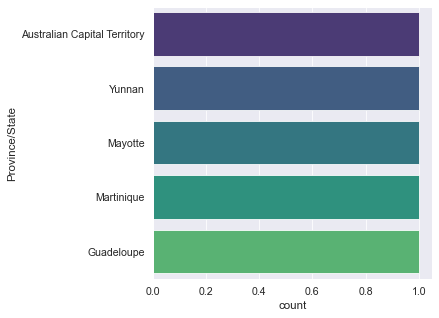

In [198]:
plt.figure(figsize = [5,5])
sns.countplot(data = count.head() ,y = 'Province/State')

<AxesSubplot:xlabel='count', ylabel='Province/State'>

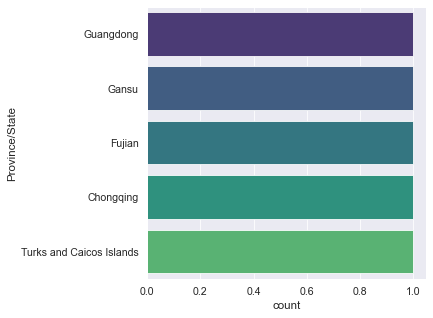

In [199]:
plt.figure(figsize = [5,5])
sns.countplot(data = count.tail() ,y = 'Province/State')

* All Province/State have same distirbution over all data 

### Country/Region	Feature 
* Categorical Feature 

In [200]:
df['Country/Region'].isnull().sum() 

0

* Has No Missing Values

In [201]:
len(df['Country/Region'].unique())

197

In [202]:
indx_mr = df['Country/Region'].value_counts().head().index
indx_lr = df['Country/Region'].value_counts().tail().index

<AxesSubplot:title={'center':'Distibution Of Most Mentioned Country'}, xlabel='Country/Region', ylabel='count'>

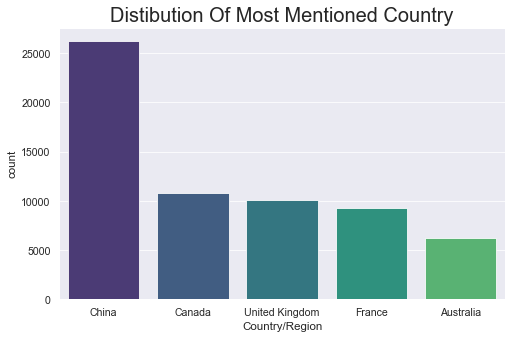

In [203]:
plt.title('Distibution Of Most Mentioned Country' , fontdict = {'fontsize' : 20})
sns.countplot(data = df[ df['Country/Region'].isin(indx_mr)] , x = 'Country/Region' , order = indx_mr)

<AxesSubplot:title={'center':'Distibution Of Least Mentioned Country'}, xlabel='Country/Region', ylabel='count'>

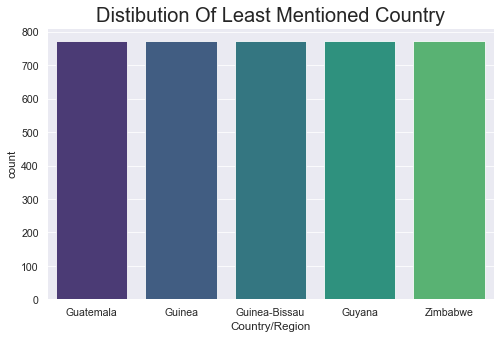

In [204]:
plt.title('Distibution Of Least Mentioned Country' , fontdict = {'fontsize' : 20})
sns.countplot(data = df[ df['Country/Region'].isin(indx_lr)] , x = 'Country/Region' , order = indx_lr)

### Date Feature 
* fisrt extract month , year 

In [205]:
df['Month'] = df['Date'].dt.month

In [206]:
df['Year'] = df['Date'].dt.year

In [207]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


<AxesSubplot:xlabel='Month', ylabel='count'>

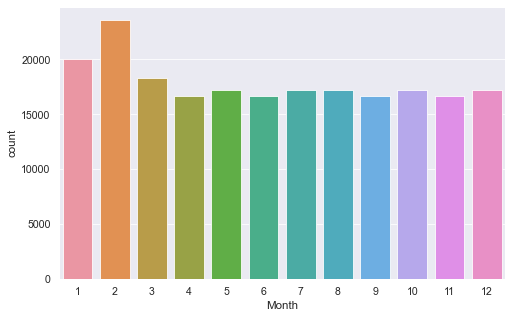

In [208]:
sns.countplot(data = df , x = 'Month')

<AxesSubplot:xlabel='Year', ylabel='count'>

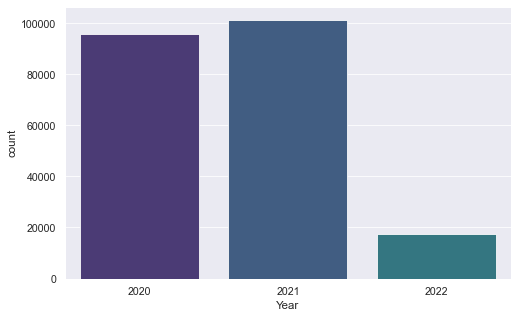

In [209]:
sns.countplot(data = df , x = 'Year')

In [210]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region', 'Month', 'Year'],
      dtype='object')

### Confirmed , Recovered , Deaths , Active are Cumulative 
* We Want fix it first 

* Confirmed

In [211]:
df.sort_values(by = 'Confirmed' , inplace = True , ascending = False)
lst = list(df['Confirmed'])
for i in range (len(lst) - 1):
    lst[i] -= lst[i+1]
df['Confirmed'] = lst
df.sort_index(inplace = True)

In [212]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
214889,NaN,West Bank and Gaza,31.952200,35.233200,2022-03-04,49,5557,0,644414,Eastern Mediterranean,3,2022
214890,NaN,Winter Olympics 2022,39.904200,116.407400,2022-03-04,0,0,0,530,NaN,3,2022
214891,NaN,Yemen,15.552727,48.516388,2022-03-04,2,2135,0,9639,Eastern Mediterranean,3,2022
214892,NaN,Zambia,-13.133897,27.849332,2022-03-04,43,3958,0,309655,Africa,3,2022
214893,NaN,Zimbabwe,-19.015438,29.154857,2022-03-04,12,5397,0,233342,Africa,3,2022


In [213]:
df.sort_values(by = 'Recovered' , inplace = True , ascending = False)
lst = list(df['Recovered'])
for i in range (len(lst) - 1):
    lst[i] -= lst[i+1]
df['Recovered'] = lst
df.sort_index(inplace = True)

In [214]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


* Deaths

In [215]:
df.sort_values(by = 'Deaths' , inplace = True , ascending = False)
lst = list(df['Deaths'])
for i in range (len(lst) - 1):
    lst[i] -= lst[i+1]
df['Deaths'] = lst
df.sort_index(inplace = True)

In [216]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


* Active

In [217]:
df.sort_values(by = 'Active' , inplace = True , ascending = False)
lst = list(df['Active'])
for i in range (len(lst) - 1):
    lst[i] -= lst[i+1]
df['Active'] = lst
df.sort_index(inplace = True)

In [218]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


### Confirmed Feature 
* Numerical Feature 

In [219]:
des = df['Confirmed'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,214894.0,368.78884,9919.347365,0.0,0.0,0.0,3.0,1368167.0


<AxesSubplot:xlabel='Confirmed', ylabel='Density'>

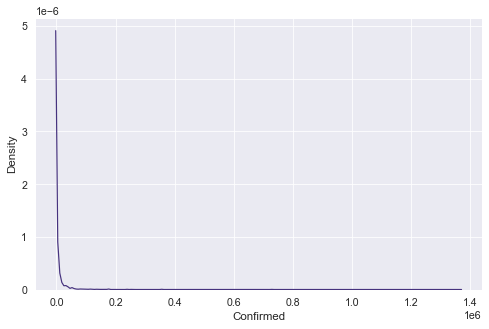

In [220]:
sns.kdeplot(x = df['Confirmed'])

<AxesSubplot:xlabel='Confirmed'>

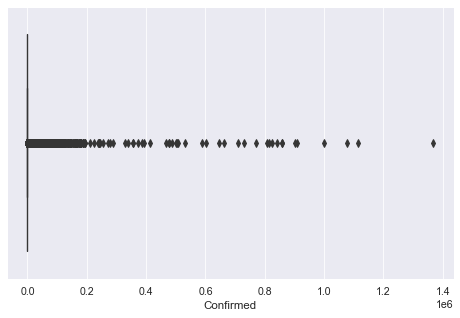

In [221]:
sns.boxplot(data = df , x = 'Confirmed')

In [222]:
df [(df['Confirmed'] > (des['75%'] + (1.5 * (des['75%'] - des['25%']))))].shape[0]

39809

### Covered Feature 
* Numerical Feature 

In [223]:
des = df['Recovered'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
Recovered,214894.0,144.13966,4285.596105,0.0,0.0,0.0,0.0,422436.0


<AxesSubplot:xlabel='Recovered', ylabel='Density'>

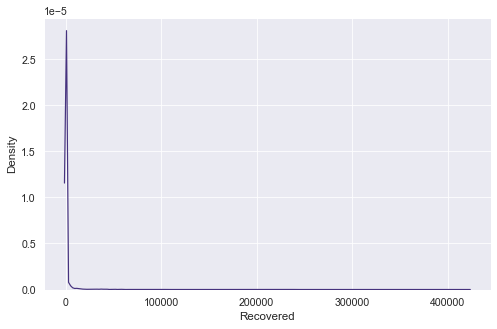

In [224]:
sns.kdeplot(x = df['Recovered'])

<AxesSubplot:xlabel='Recovered'>

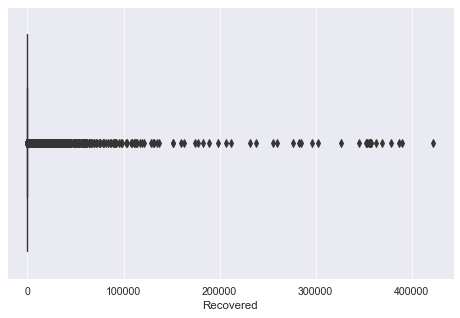

In [225]:
sns.boxplot(data = df , x = 'Recovered')

In [226]:
df [(df['Recovered'] > (des['75%'] + (1.5 * (des['75%'] - des['25%']))))].shape[0]

43793

### Deaths Feature 
* Numerical Feature

In [227]:
des = df['Deaths'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
Deaths,214894.0,4.458682,67.299796,0.0,0.0,0.0,0.0,4219.0


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

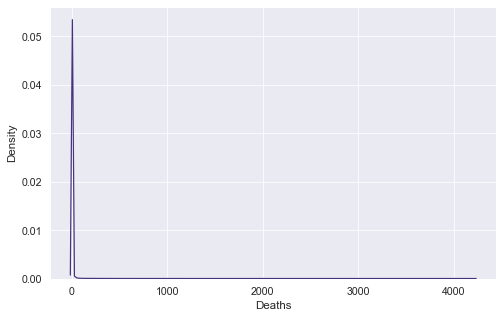

In [228]:
sns.kdeplot(x = df['Deaths'])

<AxesSubplot:xlabel='Deaths'>

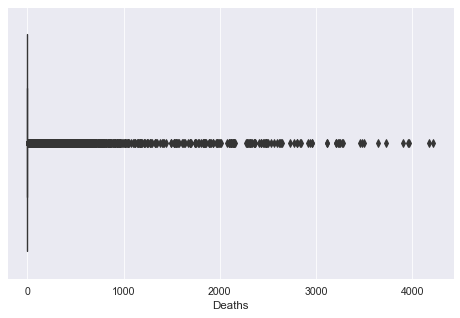

In [229]:
sns.boxplot(data = df , x = 'Deaths')

In [230]:
df [(df['Deaths'] > (des['75%'] + (1.5 * (des['75%'] - des['25%']))))].shape[0]

28316

### Acive Feature 
* Numerical Feature

In [231]:
des = df['Active'].describe()
des.to_frame().T

,count,mean,std,min,25%,50%,75%,max
Active,214894.0,364.330158,10002.255213,-163828.0,0.0,0.0,1.0,1366190.0


<AxesSubplot:xlabel='Active', ylabel='Density'>

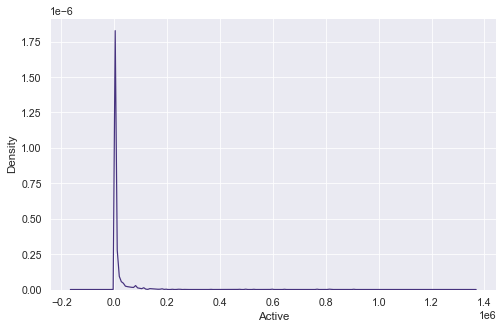

In [232]:
sns.kdeplot(x = df['Active'])

<AxesSubplot:xlabel='Active'>

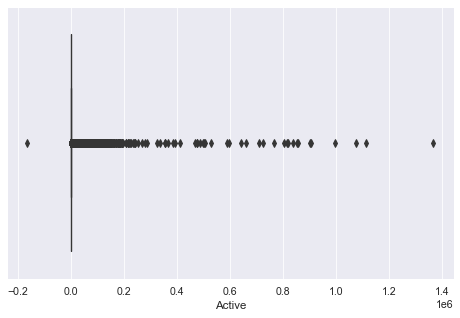

In [233]:
sns.boxplot(data = df , x = 'Active')

In [234]:
df [(df['Active'] > (des['75%'] + (1.5 * (des['75%'] - des['25%'])))) | (df['Active'] > (des['25%'] - (1.5 * (des['75%'] - des['25%']))))].shape[0]

214893

### WHO Region	
* Categorica Feature 

In [235]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', nan, 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [236]:
df['WHO Region'].value_counts().to_frame().T

,Europe,Western Pacific,Americas,Africa,Eastern Mediterranean,South-East Asia
WHO Region,64159,50245,37104,36331,17006,7730


In [237]:
df['WHO Region'].isnull().sum()

2319

<AxesSubplot:xlabel='WHO Region', ylabel='count'>

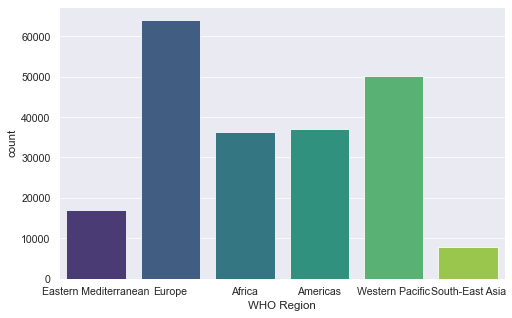

In [238]:
sns.countplot(data = df , x = 'WHO Region')

## Third BIVariant Analysis.

In [239]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


### Which State has Most and Least Confirmed cases in 2021 ?
* Get First 5 

In [240]:
df_2021 = df[ df['Year'] == 2021]

In [241]:
group = df_2021.groupby('Province/State')['Confirmed'].sum().sort_values(ascending = False)

In [242]:
group.head().to_frame().T

Province/State,Ontario,Quebec,Alberta,British Columbia,Saskatchewan
Confirmed,12058,8638,3820,2463,1388


In [243]:
group.tail().to_frame().T

Province/State,Repatriated Travellers,Montserrat,Unknown,Cook Islands,Channel Islands
Confirmed,1,1,0,0,0


In [244]:
idx = group.head().index

<AxesSubplot:xlabel='Province/State', ylabel='Confirmed'>

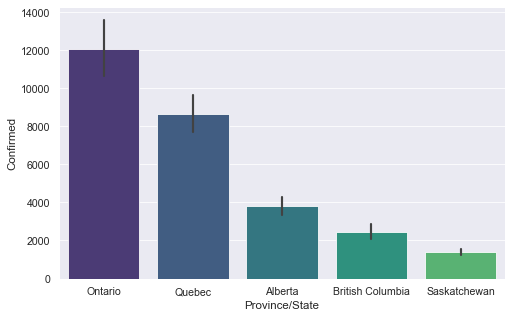

In [245]:
sns.barplot(data = df_2021[df_2021['Province/State'].isin(idx)] , x = 'Province/State' ,
            y = 'Confirmed' , estimator = np.sum , order = idx)

### Which Country has Most Confirmed Cases ?

In [246]:
group = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending = False)

In [247]:
group.head().to_frame().T

Country/Region,US,India,Brazil,United Kingdom,Russia
Confirmed,47122697,10078980,8653340,2264089,1570333


<AxesSubplot:xlabel='Country/Region', ylabel='Confirmed'>

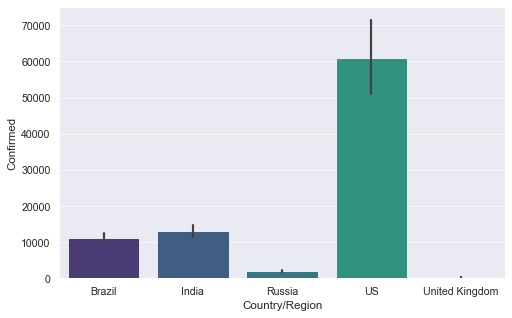

In [248]:
sns.barplot(data = df[ df['Country/Region'].isin(group.head().index)] , x = 'Country/Region' , y = 'Confirmed')

In [249]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


In [250]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


### Which Country Has Most Deaths ?

In [251]:
group = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending = False)

In [252]:
group.head().to_frame().T

Country/Region,US,Brazil,India,Mexico,Russia
Deaths,416074,139379,127341,63308,53081


In [253]:
idx = group.head().index

<AxesSubplot:xlabel='Country/Region', ylabel='Deaths'>

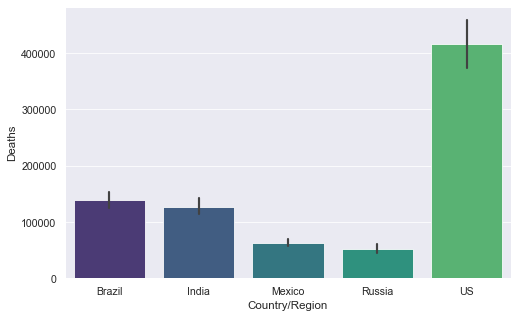

In [254]:
sns.barplot(data = df[df['Country/Region'].isin(idx)] , x = 'Country/Region' , y = 'Deaths' , estimator = np.sum)

In [255]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


### Which Region has more Recoverd cases ?

In [256]:
df.groupby('WHO Region')['Recovered'].sum().sort_values().to_frame().T

WHO Region,Western Pacific,Africa,Eastern Mediterranean,Europe,Americas,South-East Asia
Recovered,107447,165872,499294,2793693,8821184,18587258


<AxesSubplot:xlabel='WHO Region', ylabel='Recovered'>

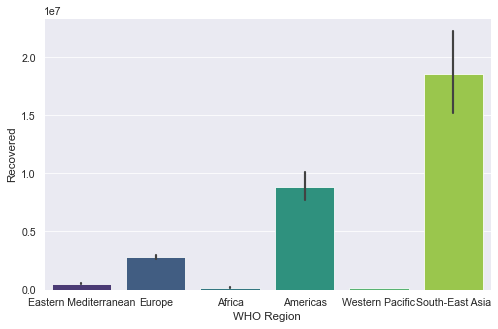

In [257]:
sns.barplot(data = df , x = 'WHO Region' , y = 'Recovered' , estimator = np.sum)

In [258]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month,Year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


### In 2021 Which have Many Confirmed , Recovered , Deaths Cases ?

In [259]:
def Get_Season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    elif m in [9, 10, 11]:
        return 'Autumn'

In [260]:
df['Season'] = df['Month'].apply(Get_Season)

In [261]:
df_2021 = df[ df['Year'] == 2021]

In [262]:
df_2021.groupby('Season')[['Confirmed' , 'Recovered' , 'Deaths']].sum()

,Confirmed,Recovered,Deaths
Season,,,
Autumn,12051827,0,237543
Spring,6810556,14938038,132378
Summer,9962378,9432634,157748
Winter,11665655,2419897,129720


* Confirmed

<AxesSubplot:xlabel='Season', ylabel='Confirmed'>

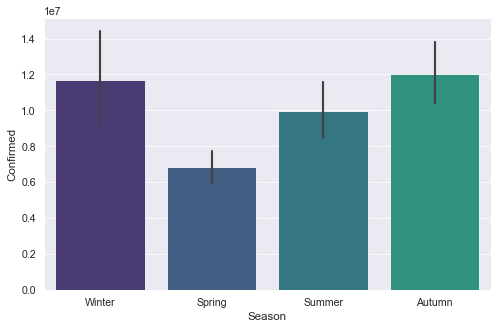

In [263]:
sns.barplot(data = df_2021 , x = 'Season' , y = 'Confirmed' , estimator = np.sum)

* Recovered

<AxesSubplot:xlabel='Season', ylabel='Recovered'>

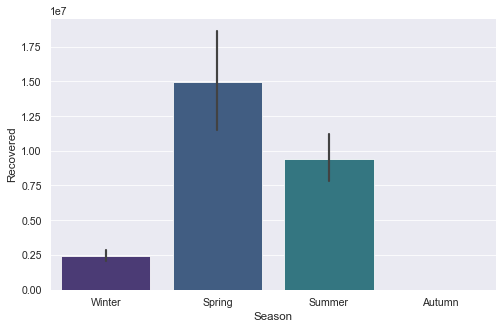

In [264]:
sns.barplot(data = df_2021 , x = 'Season' , y = 'Recovered' , estimator = np.sum)

* Deaths

<AxesSubplot:xlabel='Season', ylabel='Deaths'>

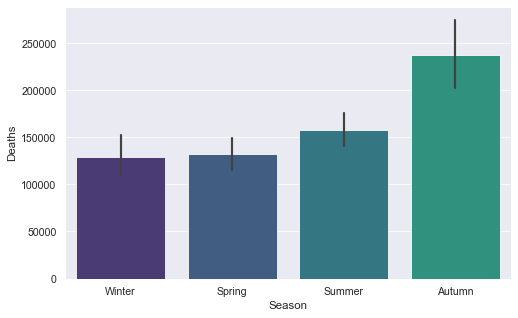

In [265]:
sns.barplot(data = df_2021 , x = 'Season' , y = 'Deaths' , estimator = np.sum)

### For Each Year Which Months has More Confirmed cases?

In [266]:
df.groupby(['Year' , 'Month'])['Confirmed'].sum().to_frame().T

Year      2020                                                              \
Month       1    2    3     4      5      6      7      8       9       10   
Confirmed    2  126  560  4223  12356  19034  41667  94027  169001  334584   

Year       ...     2021                                                        \
Month      ...       6        7        8        9        10       11       12   
Confirmed  ...  2522309  2530147  4909922  3826348  4126468  4099011  7937739   

Year           2022                   
Month            1        2       3   
Confirmed  26737714  9100423  817732  

[1 rows x 27 columns]

<AxesSubplot:xlabel='Year', ylabel='Confirmed'>

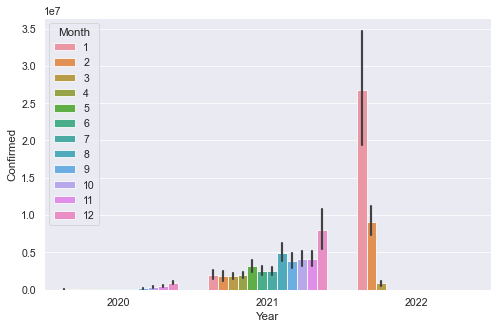

In [267]:
sns.barplot(data = df, x = 'Year' , y = 'Confirmed' , hue = 'Month' , estimator = np.sum)

### Describe Growth of Deaths , Recovered and Confirmed over Year ?

<AxesSubplot:xlabel='Year', ylabel='Deaths'>

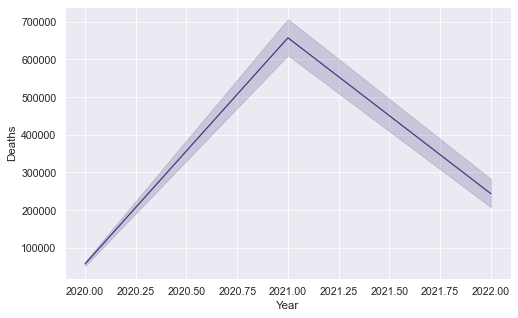

In [268]:
sns.lineplot(data = df , x = 'Year' , y = 'Deaths' , estimator = np.sum)

<AxesSubplot:xlabel='Year', ylabel='Confirmed'>

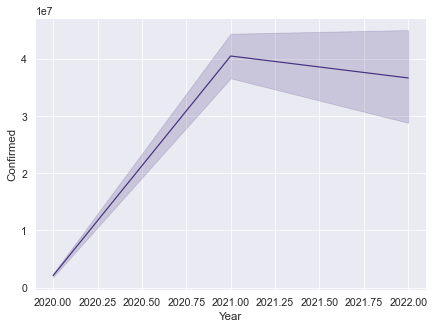

In [269]:
plt.figure(figsize = [7,5])
sns.lineplot(data = df , x = 'Year' , y = 'Confirmed' , estimator = np.sum)

<AxesSubplot:xlabel='Year', ylabel='Recovered'>

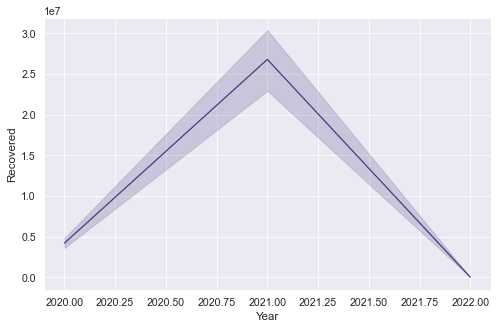

In [270]:
sns.lineplot(data = df , x = 'Year' , y = 'Recovered' , estimator = np.sum)